# Assessment 3 - Online Shoppers Purchasing Intention
#### Objective: 

In [21]:
# utility functions


## 1. Retrieving and Preparing the Data

### 1.1. Data loading

In [2]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                             roc_curve, accuracy_score, precision_score, recall_score, 
                             f1_score, matthews_corrcoef)

# dimensionality reduction
from sklearn.decomposition import PCA

# clustering
from sklearn.cluster import KMeans, DBSCAN

# data preprocessing
from sklearn.preprocessing import MinMaxScaler

# handling imbalanced data
from imblearn.over_sampling import SMOTE

# displaying outputs in jupyter
from IPython.display import display

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the dataset
file_path = 'online_shoppers_intention.csv'
df = pd.read_csv(file_path)

### 1.2. Dataset observation

In [4]:
# display the first 5 rows of the dataset
display(df.head())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
# summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

##### Analysis
The dataset contains 12,330 rows and 18 columns. There are no missing values across any of the columns, as all 18 attributes have 12,330 non-null entries.

The data types are primarily integers and floats, with a few categorical variables (object types) like **Month** and **VisitorType**, as well as Boolean variables like **Weekend** and **Revenue**. The attributes can be categorized as follows:

- Nominal values: **Month**, **VisitorType**.
- Numerical values:
  - **Discrete**: **Administrative**, **Informational**, **ProductRelated**, **OperatingSystems**, **Browser**, **Region**, **TrafficType**.
  - **Continuous**: **Administrative_Duration**, **Informational_Duration**, **ProductRelated_Duration**, **BounceRates**, **ExitRates**, **PageValues**, **SpecialDay**.
  
The **Revenue** column is a binary variable indicating whether a transaction resulted in revenue. The **Weekend** column is also Boolean, representing whether the visit occurred on the weekend.
Further analysis can be conducted to explore relationships between these variables, especially the conversion-related columns like **Revenue**.

In [6]:
# display the unique values of the 'Month' and 'VisitorType' columns
print(df['Month'].unique())
print(df['VisitorType'].unique())

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
['Returning_Visitor' 'New_Visitor' 'Other']


In [7]:
# fix typos in the 'Month' column
df['Month'] = df['Month'].replace({'June': 'Jun'})
# convert the 'Month' column to numerical values
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df['Month'] = df['Month'].map(month_map)
df = df.sort_values('Month')
# verify the changes
print(df['Month'].unique())


[ 2  3  5  6  7  8  9 10 11 12]


In [8]:
# convert the 'Month' and 'Revenue' columns to numerical
bool_columns = ['Weekend', 'Revenue']
df[bool_columns] = df[bool_columns].astype(int)

# verify the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12330 entries, 0 to 12303
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType              12

### 1.3. Comprehensive analysis and cleaning

#### 1.3.1. Numerical values

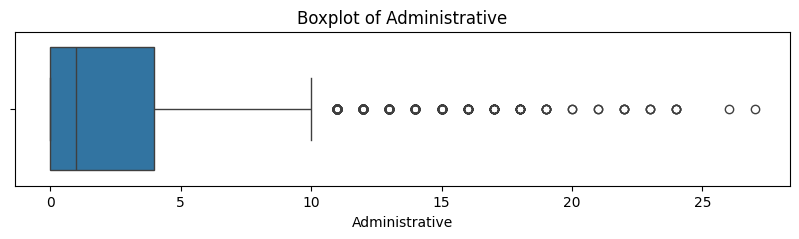

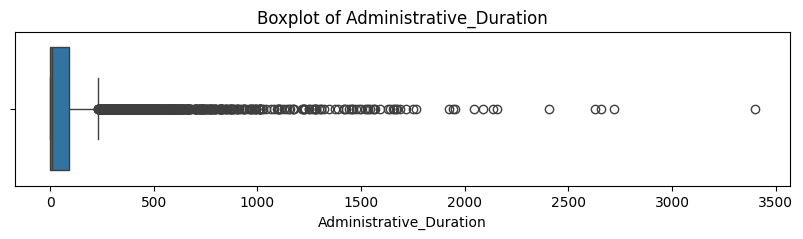

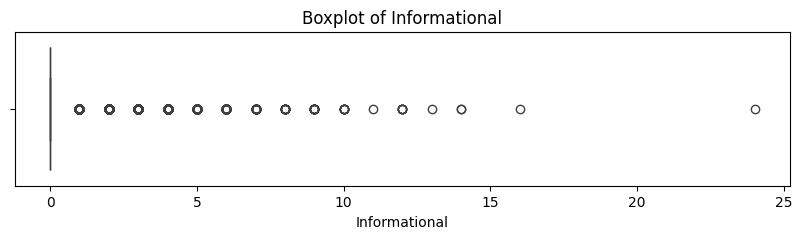

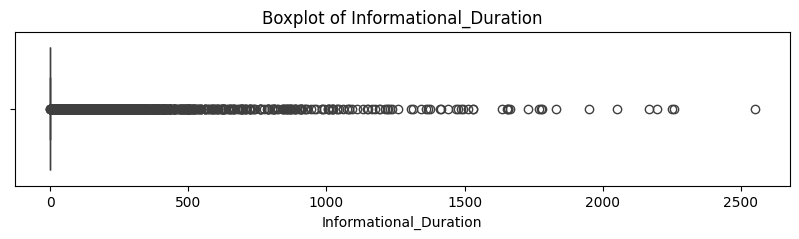

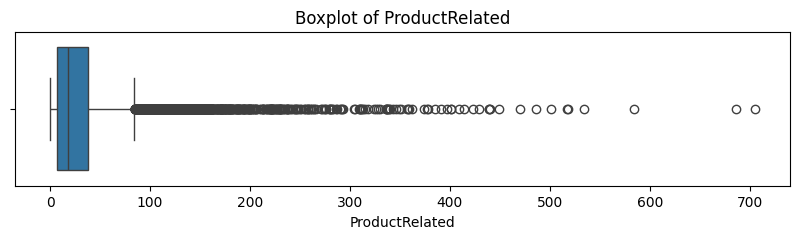

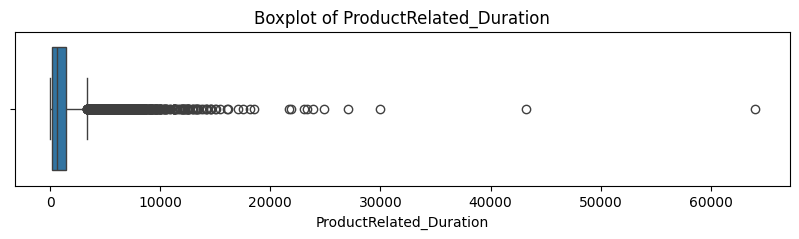

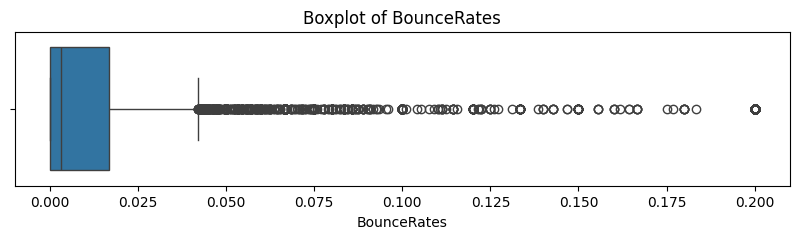

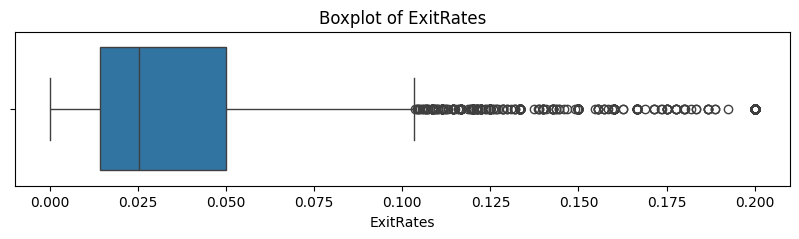

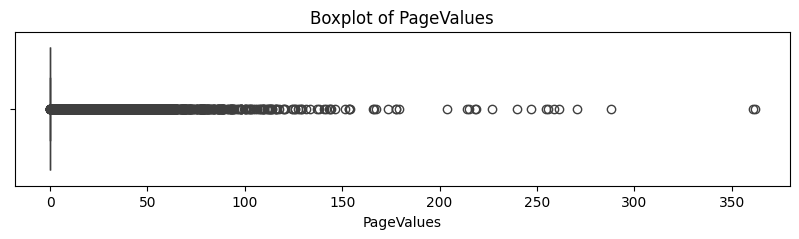

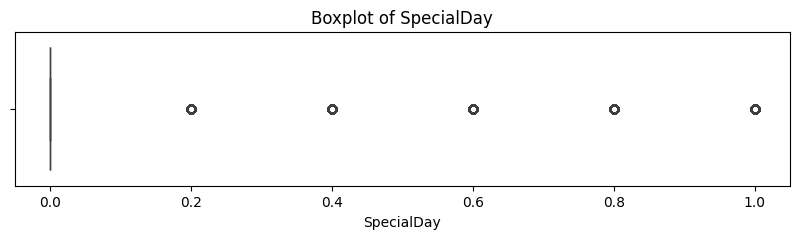

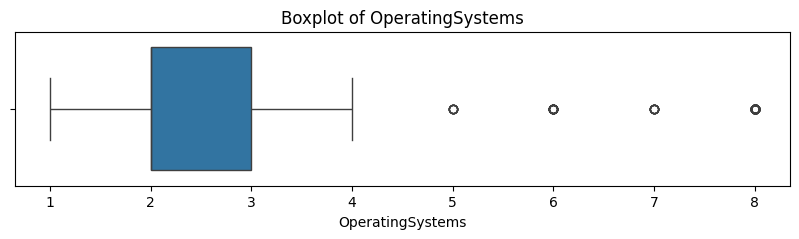

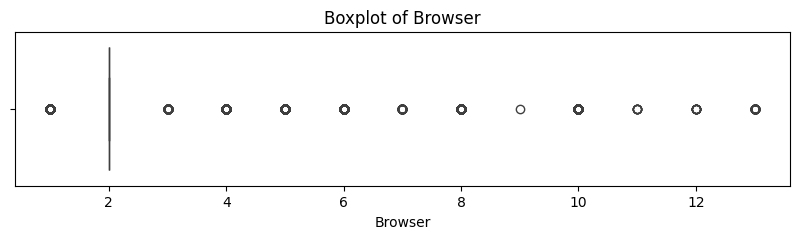

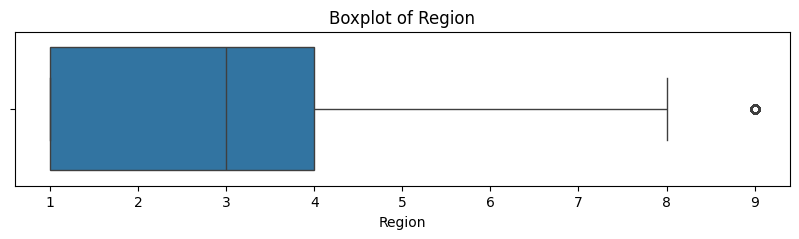

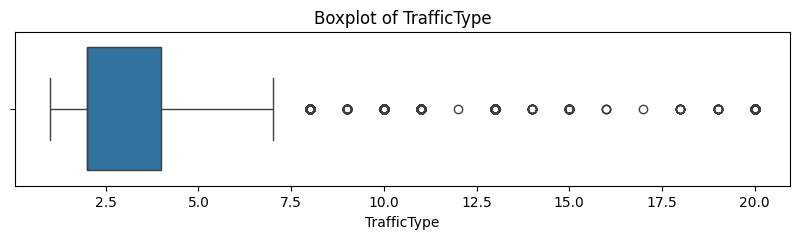

#### 1.3.2. Ordinal values

## 2. Feature Engineering

## 3. Data Modelling

### 3.1. Regression

### 3.2. Clustering

### 3.3. Classification